![idea card](images/card_lunar_new_year_rat.svg)

## Installation and Overview

At this early stage in the project, please install from GitHub. Either clone the repository or use the ```pip``` command below. 

```pip install git+https://github.com/rn123/Calendrical-Tools#egg=Calendrical-Tools```
 
Once the package is installed, the three lines below are the minimal require to **generate and print** a calendar formated as a stacked list of ISO week numbers and weeks. 

```
from calendrical_tools import candybar
cal = candybar.TextCandyBar(2020)
cal.prcandybar()```

Besides the ```Calendrical Tools``` package, this project uses the fundemntal work of Reingold & Dershowitz, Calendrical Calculations. In fact, one of the main motivations of this project is part of the close reading of Reingold & Dershowitz -- being able to reproduce the calculations and figures in their work and to develop new diagrams and illustrations to explore the topics. 

Reingold & Dershowitz have a Common Lisp implementation (Calendrica 3.0) which was ported to Python 3, [```pycalcal```](https://github.com/espinielli/pycalcal).

- Reingold, Edward M. Calendrical Calculations: The Ultimate Edition. 4 edition. Cambridge ; New York: Cambridge University Press, 2018.

In [1]:
from pycalcal import pycalcal as pcc
from calendrical_tools import candybar
from calendrical_tools.generate_astrolabe import *

# Use the jinja package to separate the formatting of the calendars and diagrams 
# (e.g. LaTex and SVG formats) from the calendrical computations.
from jinja2 import Template

import math
from IPython.core.display import SVG, Image

In [2]:
# Hack: pip commands used in development and testing.
# !pip uninstall calendrical_tools -y
# !pip install git+https://github.com/rn123/Calendrical-Tools#egg=Calendrical-Tools

## Text CandyBar

A plain text candybar is the default output. When the code is first run for a new year, a file containing lunar data will be generate which cound take a minute.

In [3]:
year = 2020
cal = candybar.TextCandyBar(year=year, weeks_before=1)

100%|██████████| 54/54 [00:00<00:00, 432.45it/s]


Generate a calendar and display it as plain text. The current default displays the Gregorian calendar for year, with all of the weeks of the year stacked one above the other. Also, the calendar prints out the ISO week number on the left. New moons are displayed as ```NM```.

<pre>
52	23 24 25 NM 27 28 29
 1	30 31  1  2  3  4  5
 2	 6  7  8  9 10 11 12
 3	13 14 15 16 17 18 19
 4	20 21 22 23 NM 25 26
 5	27 28 29 30 31  1  2
 6	 3  4  5  6  7  8  9
 7	10 11 12 13 14 15 16
 8	17 18 19 20 21 22 NM
 9	24 25 26 27 28 29  1
</pre>

**TODO:**
- Need more consistent interface to the different formatting classes.
- Need options to generate calendrical data for larger and shorter time periods.

In [5]:
%%capture capture --no-stderr
# Hack, but useful, to grab textual output from command.

cal.prcandybar()

In [6]:
print(capture.stdout)

52	23 24 25 NM 27 28 29
 1	30 31  1  2  3  4  5
 2	 6  7  8  9 10 11 12
 3	13 14 15 16 17 18 19
 4	20 21 22 23 NM 25 26
 5	27 28 29 30 31  1  2
 6	 3  4  5  6  7  8  9
 7	10 11 12 13 14 15 16
 8	17 18 19 20 21 22 NM
 9	24 25 26 27 28 29  1
10	 2  3  4  5  6  7  8
11	 9 10 11 12 13 14 15
12	16 17 18 19 20 21 22
13	23 NM 25 26 27 28 29
14	30 31  1  2  3  4  5
15	 6  7  8  9 10 11 12
16	13 14 15 16 17 18 19
17	20 21 22 NM 24 25 26
18	27 28 29 30  1  2  3
19	 4  5  6  7  8  9 10
20	11 12 13 14 15 16 17
21	18 19 20 21 NM 23 24
22	25 26 27 28 29 30 31
23	 1  2  3  4  5  6  7
24	 8  9 10 11 12 13 14
25	15 16 17 18 19 20 NM
26	22 23 24 25 26 27 28
27	29 30  1  2  3  4  5
28	 6  7  8  9 10 11 12
29	13 14 15 16 17 18 19
30	NM 21 22 23 24 25 26
31	27 28 29 30 31  1  2
32	 3  4  5  6  7  8  9
33	10 11 12 13 14 15 16
34	17 18 NM 20 21 22 23
35	24 25 26 27 28 29 30
36	31  1  2  3  4  5  6
37	 7  8  9 10 11 12 13
38	14 15 16 NM 18 19 20
39	21 22 23 24 25 26 27
40	28 29 30  1  2  3  4
41	 5  6  7  8  

In [8]:
# Current default generates four calendars, debugging statement below to check 
# that four calendars were generated and each consists of the same number of weeks.
for cal_type in cal.weeks:
    print(len(cal.weeks[cal_type]), cal_type)

54 gregorian
54 islamic
54 hebrew
54 chinese


## SVG CandyBar

In [10]:
cal = candybar.SvgCandyBar()

100%|██████████| 54/54 [00:00<00:00, 445.17it/s]


In [11]:
for cal_type in cal.weeks:
    print(len(cal.weeks[cal_type]), cal_type)

54 gregorian
54 islamic
54 hebrew
54 chinese


Styling the output can be done by updating the style parameters in the candybar object. The 

In [16]:
cal_color = {
    "iso": "grey;",
    "dim": "lightblue;",
    "highlight": "green;",
    "highlight_bold": "red;",
    "background": "yellow;"
}

cal_color = {
    "iso": "#cc232a;",
    "dim": "#cc232a;",
    "highlight": "#f5ac27;",
    "highlight_bold": "#cc232a;",
    "background": "#a3262a;"
}

cal.bar_heading = ""
cal.cal_color = cal_color
cal.prcandybar()

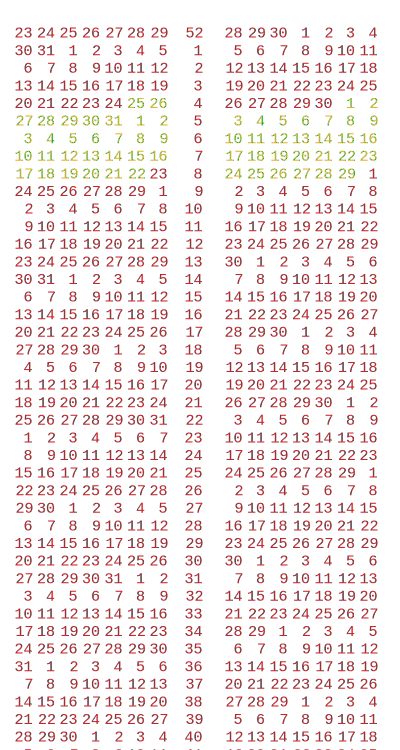

In [17]:
SVG(cal.svg)

## Astrolabe Diagram

The ```Astrolabe``` class computes a diagram providing a local view of the sky. The main parameter is the ```latitude``` of the location. To facilitate travelers, early astrolabes were constructed with with exchangeble 
plates. Quoting James Morrison:

> The earliest astrolabes, which were deeply influenced by Greek tradition,
    included plates for the latitudes of the *climates.* The climates of the world
    were defined by Ptolemy to be the latitudes where the lenght of the longest
    day of the year varied by one-half hour. Ptolemy calculated the latitude
    corresponding to a 15-minute difference in the length of the longest day
    (using a value of 23 degrees 51 minutes 20 seconds for the obliquity of
    the ecliptic) for 39 latitudes, which covered the Earth from the equator
    to the North Pole. The ones called the classic *climata* were for the
    half-hour differences in the longest day covering the then populated world."""

In [18]:
plate_parameters = {"Hawaiian Islands": 21.3069}
astrolabe = Astrolabe(plate_parameters=plate_parameters)
plate = astrolabe.plates["Hawaiian Islands"]

The current version inclues a short animation, showing the motion of the ecliptic across the local sky.

In [19]:
animation_parameters = {"from": "0", "to": "233", "begin": "0s", "dur": "5s"}

with open("../calendrical_tools/astrolabe_template.svg") as fp:
    template_text = fp.read()

In [20]:
# Use Inkscape extensions to svg to place different parts of astrolabe into their own layer.
inkscape_attributes = {
    identifier: 'inkscape:label="{}" inkscape:groupmode="layer"'.format(identifier)
    for identifier in identifiers
}

In [21]:
ecliptic={
        "cx": astrolabe.xEclipticCenter,
        "cy": astrolabe.yEclipticCenter,
        "r": astrolabe.RadiusEcliptic,
        "width": 5,
    }

In [22]:
outer_radius = ecliptic["r"] 
inner_radius = ecliptic["r"] - ecliptic["width"]

top_middle_outer =    {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] + outer_radius)}
bottom_middle_outer = {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] - outer_radius)}

top_middle_inner =    {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] + inner_radius)}
bottom_middle_inner = {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] - inner_radius)}

In [23]:
template = Template(template_text)
astrolabe_svg = template.render(
    place_name=plate["location"],
    latitude=plate["latitude"],
    RCapricorn=astrolabe.RadiusCapricorn,
    REquator=astrolabe.RadiusEquator,
    RCancer=astrolabe.RadiusCancer,
    horiz=plate["horizon"],
    almucantor_coords=plate["almucantars"],
    almucantar_center=plate["almucantar_center"],
    azimuth_coords=plate["azimuths"],
    prime_vertical=plate["prime_vertical"],
    ticks=astrolabe.ticks,
    ecliptic=ecliptic,
    top_middle_outer=top_middle_outer,
    bottom_middle_outer=bottom_middle_outer,
    outer_radius=outer_radius,
    inner_radius=inner_radius,
    top_middle_inner=top_middle_inner,
    bottom_middle_inner=bottom_middle_inner,
    stroke_color=cal_color["highlight"],
    background_color=cal_color["background"],
    inkscape=inkscape_attributes,
    animation=animation_parameters,
    moons = [(44.142706092611434, 214.41520455448494),
        (-64.29833725607341, 244.05007530120906),
        (19.338217263234128, 274.11533327404277),
        (17.224801417675735, 304.36003467896535),
        (-64.16194195841945, 334.4763799297398),
        (-25.561893428663097, 4.203505420431007)],
    suns = [214.41713740391424,
        244.05065884583018,
        274.1147430450437,
        304.35973321930214,
        334.47736243435793,
        4.204523538166541]
    )

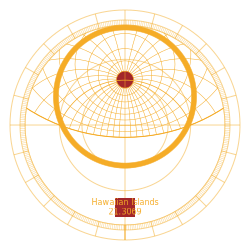

In [24]:
SVG(data=astrolabe_svg)

## Sun, moon, and stars

In [ ]:
nms = cal.new_moons
rds = [float(nms[rd][2]) for rd in nms]
solar_coords = []
for rd in rds:
    solar_coords.append(( float(pcc.solar_longitude(rd))))

$\sin\delta = \sin\beta\cos\epsilon + \cos\beta \sin\epsilon \sin\lambda$

Since $\beta = 0$ for the sun, the formula simplifies to:

$\sin\delta = \sin\epsilon \sin\lambda$ 

In [ ]:
math.sin(astrolabe._obliquityRadians) * math.sin(math.radians(solar_coords[0]))
tmp = math.sin(astrolabe._obliquityRadians) * math.sin(math.radians(solar_coords[0]))
declination = math.asin(tmp)

## 鼠年大吉

In [25]:
with open("../docs/images/rat.svg") as fp:
    rat_svg = fp.read()

In [26]:
rat_template = """
<svg viewbox="0 0 300 300" 
     width="300" height="300" 
     xmlns="http://www.w3.org/2000/svg" 
     xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" 
     xmlns:xlink="http://www.w3.org/1999/xlink">
<defs>
    <style type="text/css">
        #983: { fill: red;
        } 
    </style>
</defs>
<g id="rat">
    <title>Year of the Rat </title>
        {{ rat }}
</g>
</svg>
"""

In [27]:
template = Template(rat_template)
svg = template.render(rat=rat_svg, background=cal_color["background"])

In [28]:
SVG(svg)

## Concept Card for Project

In [29]:
card_template = """
<svg viewbox="0 0 1280 640" 
     width="1280" height="640" 
     xmlns="http://www.w3.org/2000/svg" 
     xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" 
     xmlns:xlink="http://www.w3.org/1999/xlink">
     
<g id="card">
    <title>SVG CandyBar</title>
    <defs>
        <g transform="scale(1.3)">
            <clipPath id="hole">
               <path d="M75 75 L 1205 75 L 1205 565 L 75 565Z" 
                     style="stroke: {{ cal_color.highlight }} 
                     fill: {{ cal_color.background }}"/>
            </clipPath>
        </g>
    </defs>
    
    <g>
        <rect x="75px" y="75px" width="1130" height="490" 
              style="stroke: {{ cal_color.highlight }} fill: {{ cal_color.background }}"/>
    </g>

    <g transform="translate(560, 138)">
        <text x="65" y="40" writing-mode="tb" 
              style="font-size:60; font-family: Courier Arial, Helvetica, sans-serif; fill:{{ cal_color.highlight }} fill-opacity:1.0;">鼠年大吉
            <tspan x="0" y="40" writing-mode="tb" style="font-size: 60;">恭喜發財</tspan>
        </text>
        <line x1="-30" y1="40" x2="-30" y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
        <line x1="35"  y1="40" x2="35"  y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
        <line x1="100" y1="40" x2="100" y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
    </g>
    
    <g>
        <text x="95" y="125"
              style="font-size:30; fill: {{ cal_color.highlight }};fill-opacity:1.0;">Calendrical Tools 2020</text>
        <g transform="translate(1130, 465) scale(0.45)">
            {{ rat }}
        </g>
    </g>
    
    <g transform="translate(700, 70)">
        <g transform="scale(2)">
            {{ astrolabe}}
        </g>
    </g>
    
    <g style="clip-path: url(#hole);">
        <rect x="75" y="155" width="400" height="430" style="stroke: {{ cal_color.highlight }} fill:none;"/>
        <rect x="65" y="165" width="400" height="430" style="stroke: {{ cal_color.highlight }} fill:none;"/>
        <g transform="translate(75, 155)">
            {{ candybar }}
        </g>
    </g>
    

</g></svg>
""" 

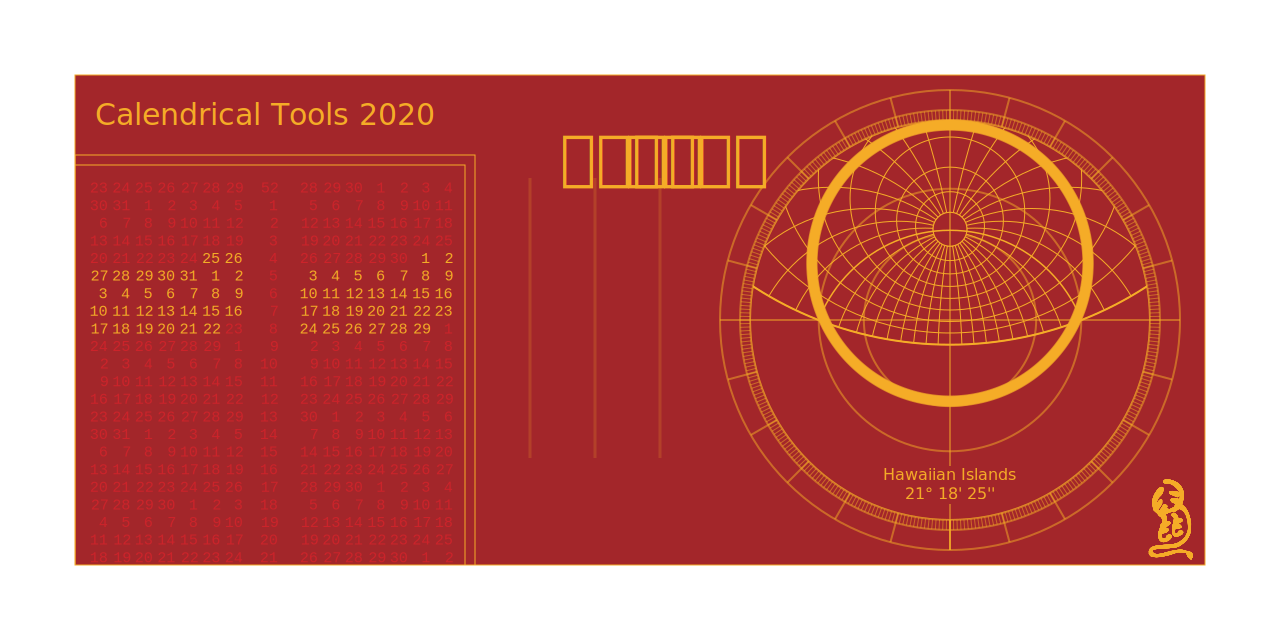

In [30]:
template = Template(card_template)
astrolabe_svg = astrolabe_svg.replace('21.3069', "21° 18' 25''")
card_svg = template.render(candybar=cal.svg, astrolabe=astrolabe_svg, 
                           rat=rat_svg, cal_color=cal_color)
SVG(card_svg)

In [31]:
with open('card.svg', 'w') as fp:
    fp.write(card_svg)

**TODO:**
- The current ``png`` image displays the vertical strings of Chinese c

In [32]:
try:
    import cairosvg
except Exception as ex:
    print('Exception {}. Install cairosvg: '.format(ex))
    !pip install cairosvg

In [33]:
def png_from_svg(filename="card.svg"):
    with open(filename) as fp:
        card_svg = fp.read()
    
    return cairosvg.svg2png(card_svg)

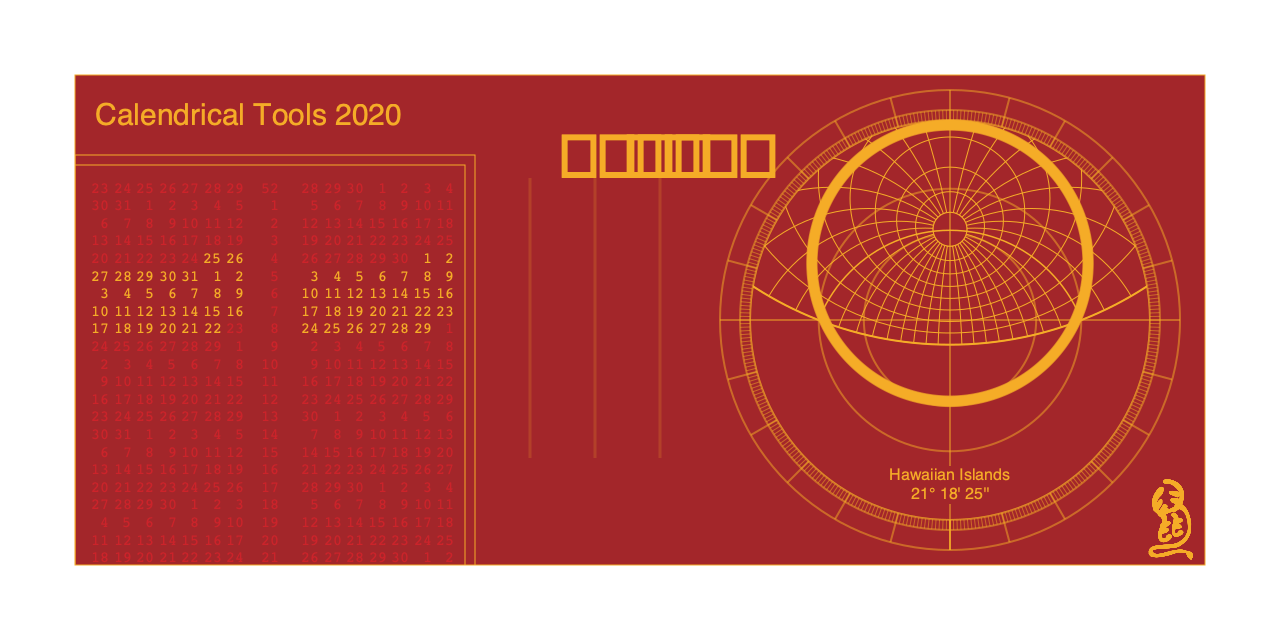

In [34]:

png = png_from_svg()
Image(png)